### Unit2_Lesson2_naive_bayes_drill

##### Unsing Naive Bayes analyse feedback: categorization of feebacks into positive or negative - Amazon data

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
%matplotlib inline

##### Import the raw data as a table. This forms the trianing dataset for our model

In [185]:
#import raw data (Amazon). This data is in txt consisting of tab seperated lines, each line represents a feedback.
#0 or 1 appended to the start of every feedback represent the classification of the previous feedback. 0 means negative while 
#one means positive.

raw_data = pd.read_table('amazon_cells_labelled_2_2_drill.txt', sep='\t')

In [186]:
raw_data.columns = ['feedback', 'classification']
raw_data.head()

,feedback,classification
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [187]:
#prepare the 'feedback' column to aid keyword search. Strip all punctuations using re

import re
raw_data['feedback_striped'] = raw_data.feedback.apply(lambda x: re.sub(r'[^\w\\x]',' ',x))   

In [188]:
#rearrange columns

cols = raw_data.columns.tolist()
#print(cols)

processed_data = raw_data[['feedback', 
                          'feedback_striped', 
                          'classification'
                          ]]
processed_data.head()

,feedback,feedback_striped,classification
0,"Good case, Excellent value.",Good case Excellent value,1
1,Great for the jawbone.,Great for the jawbone,1
2,Tied to charger for conversations lasting more...,Tied to charger for conversations lasting more...,0
3,The mic is great.,The mic is great,1
4,I have to jiggle the plug to get it to line up...,I have to jiggle the plug to get it to line up...,0


In [189]:
#create keywords and phrases that closesly surgest a positive feedback and create features with them

keywords_positive = ['fantastic', 'excellent', 'good', 'better', 'best', 'nice', 'amazing', 'awesome', 'value', 'great']

for key in keywords_positive:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    processed_data[str(key)] = processed_data.feedback.str.contains(
        str(key),
        case=False
    )
    
processed_data.head()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,feedback,feedback_striped,classification,fantastic,excellent,good,better,best,nice,amazing,awesome,value,great
0,"Good case, Excellent value.",Good case Excellent value,1,False,True,True,False,False,False,False,False,True,False
1,Great for the jawbone.,Great for the jawbone,1,False,False,False,False,False,False,False,False,False,True
2,Tied to charger for conversations lasting more...,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False
3,The mic is great.,The mic is great,1,False,False,False,False,False,False,False,False,False,True
4,I have to jiggle the plug to get it to line up...,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,False,False


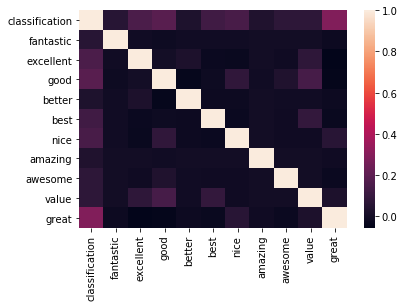

In [190]:
sns.heatmap(processed_data.corr())

#no significant correllation as per below heatmap

In [191]:
data = processed_data[keywords_positive]
target = processed_data['classification']

In [192]:
# Our data is binary / boolean (spam or ham), so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [193]:
#predict outcome
y_pred = bnb.predict(data)
#print(y_pred)

#print out accuracy
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
    
))

Number of mislabeled points out of a total 999 points : 309


#### Testing our classifier with another with another data (yelp feedback data)

In [196]:
raw_data_yelp = pd.read_table('yelp_labelled_2_2_drill.txt', sep='\t')
raw_data_yelp.columns = ['feedback', 'classification']
raw_data_yelp.head()

,feedback,classification
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


In [198]:
#strip punctuation from data
raw_data_yelp['feedback_striped'] = raw_data_yelp.feedback.apply(lambda x: re.sub(r'[^\w\\x]',' ',x)) 

#rearrange the columns and rename dataframe
processed_data_yelp = raw_data_yelp[['feedback', 
                          'feedback_striped', 
                          'classification'
                          ]]

processed_data_yelp.head()

,feedback,feedback_striped,classification
0,Crust is not good.,Crust is not good,0
1,Not tasty and the texture was just nasty.,Not tasty and the texture was just nasty,0
2,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,Now I am getting angry and I want my damn pho,0


In [199]:
#use new data(yelp) to run classifier.
#data = processed_data[keywords_positive]: since the model is not changing, the data part is retained
#Target will change to the new data
target = processed_data_yelp['classification']

#fit the new target into the model
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [200]:
#predict outcome
y_pred = bnb.predict(data)
#print(y_pred)

#print out accuracy
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
    
))

Number of mislabeled points out of a total 999 points : 475


##### As can be seen from the result, this model's performance was reduced with a new set of data
With the original data with which the model was built, it only got 309 prediction wrong <br>
Meanwhile it got a whopping 475 predictions wrong with the new data <br>
I thinks it will be beneficial to always build a new model for every set of data for this classifier <br>